In [2]:
# First import everthing you need
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [12]:
from timing_utils import weighted_moments
from statistics import harmonic_mean

In [31]:
TOAs = np.array([-1111110.000145, -0.000003, -0.00033, -0.0003, -0.000538])
errors = np.array([10.097501, 2.097501, 10.097501, 2, 30.097501])
weights = np.power(errors, -2)
print(weights)

TOA_weigthed, sigma_TOA = weighted_moments(series=TOAs, weights=weights, unbiased=False, harmonic=True)

print(TOA_weigthed)
print(sigma_TOA)

[0.00980781 0.22729802 0.00980781 0.25       0.00110392]
-43937.963563654
4.999999999999999


In [30]:
harmonic_mean(np.array([1000,4,4]))

5.9880239520958085

In [2]:
# Create some random data, I took this piece from here:
# http://matplotlib.org/mpl_examples/mplot3d/scatter3d_demo.py
def randrange(n, vmin, vmax):
    return (vmax - vmin) * np.random.rand(n) + vmin

n = 100
xx = randrange(n, 23, 32)
yy = randrange(n, 0, 100)
zz = randrange(n, -50, -25)

In [17]:
file: str = "/media/svsosafiscella/D86091306091167A/NANOGrav/results/820_band/0.0_sigma/features.pkl"
df = pd.read_pickle(file)

xx = df["Width"].to_numpy()
yy = df["Energy"].to_numpy()
zz = df["Amp"].to_numpy()

In [18]:
# Create a figure and a 3D Axes
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
sns.set_context("talk")

ax.set_xlabel('Width')
ax.set_ylabel('Energy')
ax.set_zlabel('Amplitude')

# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
def init():
    ax.scatter(xx, yy, zz, marker='o', s=20, c="blue", alpha=0.6)
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

/tmp/ipykernel_7293/93237036.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [54]:
clustered_file: str = "/media/svsosafiscella/D86091306091167A/NANOGrav/results/820_band/0.0_sigma/8_kmeans_clusters.pkl"
clustered_data = pd.read_pickle(clustered_file)

xx = clustered_data["Width"].to_numpy()
yy = clustered_data["Energy"].to_numpy()
zz = clustered_data["Amp"].to_numpy()

clusters = clustered_data["Cluster"].to_numpy().astype(int)
print(clusters)
colors = ['blue', 'green', 'red', 'orange', 'purple']

[5 4 4 ... 5 4 5]


In [55]:
gk = clustered_data.groupby("Cluster")

In [56]:
for name, group in gk:
    print(name)

0
1
2
3
4
5
6
7


/tmp/ipykernel_8770/4294693750.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7


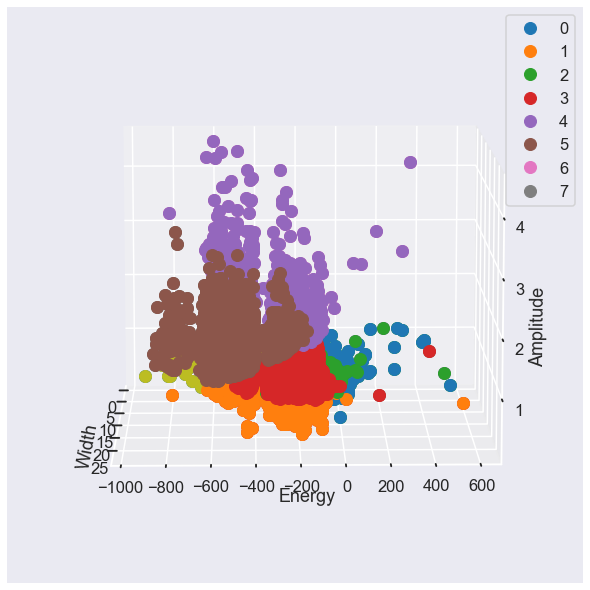

In [57]:
# Create a figure and a 3D Axes
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
sns.set_context("talk")

ax.set_xlabel('Width')
ax.set_ylabel('Energy')
ax.set_zlabel('Amplitude')

# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
def init():

    groups = clustered_data.groupby('Cluster')

    for name, group in gk:
        plt.plot(group.Width, group.Energy, group.Amp, marker='o', linestyle='', markersize=12, label=name)

#    ax.scatter(xs=clustered_data.Width, ys=clustered_data.Energy, zs=clustered_data.Amp,
#               marker='o', s=20, cmap='grey', alpha=0.6)
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
plt.legend()
anim.save('clustered2.mp4', fps=30, extra_args=['-vcodec', 'libx264'])